In [1]:
#Advance Regression Assignment
# Import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.preprocessing import scale
import os
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import and read the data
#import the data
hsng = pd.read_csv('train.csv')
hsng.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
hsng.shape

(1460, 81)

In [4]:
hsng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
#Identify value counts in Columns
for i in hsng.columns:
        print(i)
        print(hsng[i].value_counts(normalize=True))

Id
Id
1       0.000685
982     0.000685
980     0.000685
979     0.000685
978     0.000685
          ...   
485     0.000685
484     0.000685
483     0.000685
482     0.000685
1460    0.000685
Name: proportion, Length: 1460, dtype: float64
MSSubClass
MSSubClass
20     0.367123
60     0.204795
50     0.098630
120    0.059589
30     0.047260
160    0.043151
70     0.041096
80     0.039726
90     0.035616
190    0.020548
85     0.013699
75     0.010959
45     0.008219
180    0.006849
40     0.002740
Name: proportion, dtype: float64
MSZoning
MSZoning
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: proportion, dtype: float64
LotFrontage
LotFrontage
60.0     0.119067
70.0     0.058285
80.0     0.057452
50.0     0.047460
75.0     0.044130
           ...   
137.0    0.000833
141.0    0.000833
38.0     0.000833
140.0    0.000833
46.0     0.000833
Name: proportion, Length: 110, dtype: float64
LotArea
LotArea
7200     0.017123
9600     0.0

In [6]:
# only selecting the non categorical variables
hsng_num = hsng.select_dtypes(include=['float64', 'int64'])
hsng_cont = hsng_num[['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']]
hsng_cont

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0,0,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0,0,181500
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0,0,223500
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0,0,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,0.0,0,0,953,953,953,694,0,1647,460,0,40,0,0,0,0,0,175000
1456,85.0,13175,119.0,790,163,589,1542,2073,0,0,2073,500,349,0,0,0,0,0,0,210000
1457,66.0,9042,0.0,275,0,877,1152,1188,1152,0,2340,252,0,60,0,0,0,0,2500,266500
1458,68.0,9717,0.0,49,1029,0,1078,1078,0,0,1078,240,366,0,112,0,0,0,0,142125


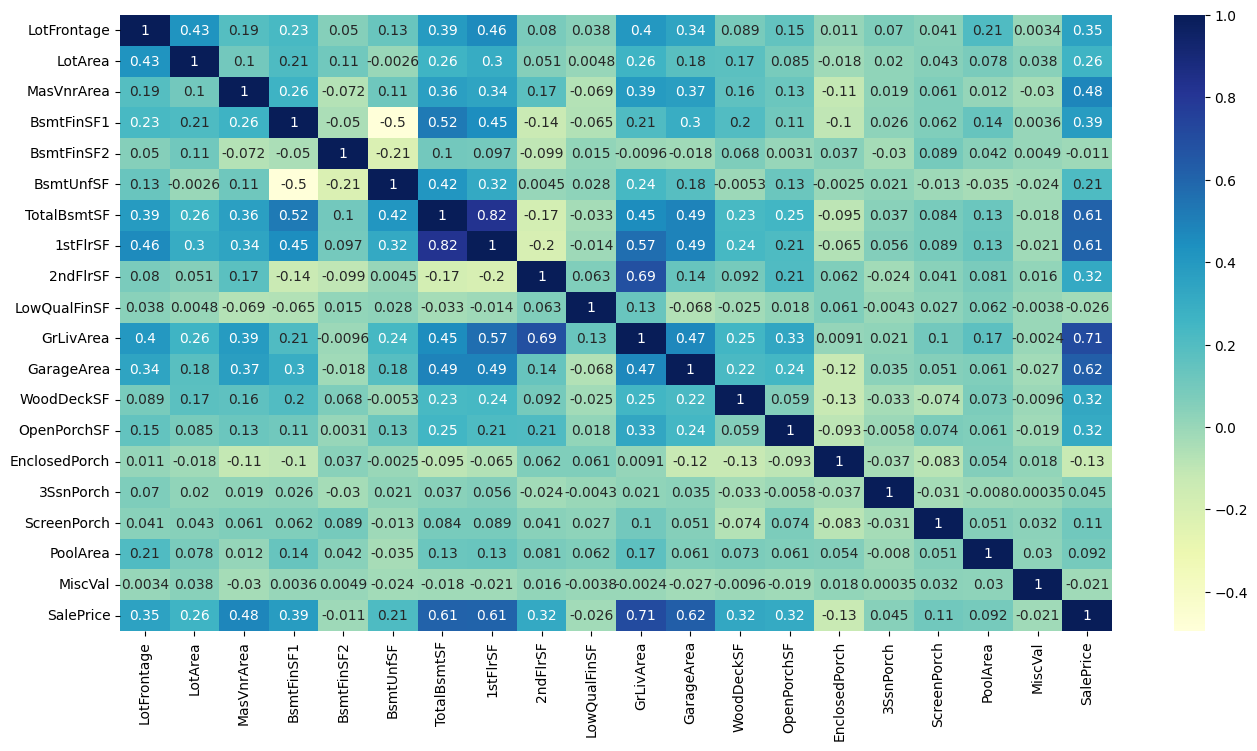

In [7]:
# correlation matrix - # Visualizing correlations in the numeric data - using heatmap
cor = hsng_cont.corr()
plt.figure(figsize=(16,8))
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [8]:
#As the heatmp shows the target variable -SalePrice has GirlivArea,GarageArea,1stFlrSF among others

In [9]:
#Listing out missing value columns to address it using Imputation or Removal
null_val = (hsng[hsng.columns[hsng.isna().any()]].isna().sum() / 1460) * 100
null_val

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

In [10]:
#Drop columns with null values above 80%
hsng=hsng.drop(columns=['Alley','PoolQC','Fence','MiscFeature'])

In [11]:
hsng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [12]:
#Data Imputation - Missing value replacement
hsng.LotFrontage = hsng.LotFrontage.fillna(hsng['LotFrontage'].median())
#Data Imputation - MasVnrArea
hsng.MasVnrArea = hsng.MasVnrArea.fillna(hsng.MasVnrArea.median()) 
#Data Imputation - MasVnrType
hsng.MasVnrType = hsng.MasVnrType.fillna('None')
#BsmtQual
hsng.BsmtQual = hsng.BsmtQual.fillna('NA')
#replace Nan values of BsmtCond with NA i.e. No Basement
hsng.BsmtCond = hsng.BsmtCond.fillna('NA')
#BsmtExposure
hsng.BsmtExposure = hsng.BsmtExposure.fillna('No')
#BsmtFinType1
hsng.BsmtFinType1 = hsng.BsmtFinType1.fillna('NA')
#BsmtFinType2
hsng.BsmtFinType2 = hsng.BsmtFinType2.fillna('NA')
#impute Electrical values with mode due to categorical column
hsng.Electrical = hsng.Electrical.fillna(hsng.Electrical.mode()[0])    
#GarageType
hsng.GarageType = hsng.GarageType.fillna('NA')
#GarageYrBlt
hsng.GarageYrBlt = hsng.GarageYrBlt.fillna(0)
#GarageFinish
hsng.GarageFinish = hsng.GarageFinish.fillna('NA')
#GarageQual
hsng.GarageQual = hsng.GarageQual.fillna('NA')
#replace Nan values of GarageFinish with NA i.e. No Garage
hsng.GarageCond = hsng.GarageCond.fillna('NA')
#check missing values again
hsng.isnull().sum()[hsng.isnull().sum()>0]
#Fireplace has many missing values, impute & check null values. 
hsng.FireplaceQu = hsng.FireplaceQu.fillna('NA')
hsng.isnull().sum()[hsng.isnull().sum()>0]

Series([], dtype: int64)

In [13]:
# Creating dummy # Split into X and y
cols=hsng.columns
Trgt_Var= hsng.loc[:,'SalePrice']
X = hsng.loc[:,cols]
y = Trgt_Var
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [14]:
# Creating dummy variables for categorical variables
hsng_cat = X.select_dtypes(include = ['object'])
hsng_cat.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,NA,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [15]:
# Converting to dummy variables (one hot encoding)
hsng_dum = pd.get_dummies(hsng_cat, drop_first=True,dtype=int)
hsng_dum.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [16]:
#Drop the Categorical columns as Dummy Variables are created from them
X = X.drop(list(hsng.columns), axis =1)

In [17]:
# concat dummy variables with X
X = pd.concat([X, hsng_dum], axis = 1)

In [18]:
# Feature scaling of X
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols

In [19]:
# Feature scaling of y
y = pd.Series(scale(y))

In [20]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size = 0.3, random_state=100)

In [21]:
# Initialising linear regression modelandffitiing a line
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [22]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-576116648501.3923
[ 1.29659818e-01  7.05671825e-02  2.63877815e-01  2.20459411e-01
  1.15311291e-02 -4.72313483e-03  1.89723831e-02 -2.59972582e-03
  1.57071461e-02  2.09892278e-02  4.46342742e-02 -1.32013107e-02
  3.02191953e-02 -5.18333084e-02 -5.26226080e-03 -3.57651426e-02
  1.46632003e-02  3.18310879e-02 -2.81924820e-03 -1.33265377e-02
 -3.47822269e-02 -1.14189283e-02 -2.46693544e-02  6.10822358e-02
 -7.14339495e-02 -4.51275116e-02 -4.14889049e-02 -4.44679993e-02
 -5.36640092e-02 -5.51828690e-02  1.78394844e-02  2.31129588e-02
  1.68935466e-01  7.16646574e-02 -5.11271532e-02  9.33735172e-03
 -4.18948220e-02 -4.78504681e-03  5.75139493e-02  6.72142432e-02
 -5.78894237e-03  2.11250200e-02  1.20146332e-03  4.29453023e-02
  1.23890483e-02  7.80452610e-03 -3.03952025e-03 -1.87572893e-03
 -7.22439741e-03 -2.11826096e-02  4.07326533e-02  3.26641826e-02
  5.48448493e-02 -8.09213222e-02  1.66108306e-02  6.92886298e-03
  2.85556282e-02 -2.56869794e-02  2.78811855e-02 -8.35237160e-02
 -1.39

In [23]:
# Predict and print the r2 values for training set
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

0.8576230339175879


In [24]:
#Print r2 for test set
r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

-6.44213327678576e+26


In [25]:
rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

144.0455033906799


In [26]:
rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

2.8792025519366725e+29


In [27]:
#Print RMSE for train set
mse_train = mean_squared_error(y_train, y_pred_train)
print(mse_train)
metric.append(mse_train**0.5)

0.14108276531898128


In [28]:
#Print RMSE for test set
mse_test = mean_squared_error(y_test, y_pred_test)
print(mse_test)
metric.append(mse_test**0.5)

6.573521808074595e+26


In [29]:
#After Linear Regression, Initialize Ridge Regression & later compare
# declaring a list of alphas for hyperparameter tuning
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 
                    3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()
# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, param_grid = params, scoring= 'neg_mean_absolute_error',  
                        cv = folds,  return_train_score=True, verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [30]:
#Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [31]:
#Fitting Ridge model for alpha = 100 and printing coefficients which are penalised
alpha = 100
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 1.78591118e-02  1.51900195e-02  4.16757796e-02  8.32398613e-03
  1.46632302e-02  4.22391647e-03 -2.67090891e-03 -8.62527701e-03
  1.99340154e-02  1.46495363e-02  3.87830056e-02 -1.32996052e-02
  3.44986142e-02 -4.01285853e-02 -1.04002251e-02 -2.50812606e-02
  1.16515147e-02  2.16622405e-02 -1.15896110e-03 -8.90618754e-03
 -2.90757078e-02  6.40664588e-04 -1.91020264e-02  5.97065398e-02
 -6.23013666e-02 -4.73529631e-02 -4.24373620e-02 -4.59194910e-02
 -3.79689309e-02 -4.55926273e-02  1.88567792e-02  2.26962097e-02
  1.68856498e-01  1.20378728e-01 -3.49441668e-02  7.71361256e-03
 -3.15885456e-02  2.02331086e-03  5.69183932e-02  6.72097745e-02
  5.99234156e-03  2.14647986e-02 -1.43992284e-02  3.47643944e-02
  1.83146799e-02  1.46112381e-02 -7.16675367e-03  5.37646128e-03
 -4.54560108e-03 -4.66013063e-03  1.87641909e-02  1.86147265e-02
  5.18479772e-02 -7.14547025e-02  1.03366571e-02  4.24902312e-03
  1.61838908e-02 -2.38933279e-02  2.23047939e-02 -8.07070024e-02
 -1.19679724e-01 -1.45698

In [32]:
# calculating R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)
metric2 = []
r2_train = r2_score(y_train, y_pred_train)
print(r2_train)
metric2.append(r2_train)

0.8390392957519677


In [33]:
r2_test = r2_score(y_test, y_pred_test)
print(r2_test)
metric2.append(r2_test)

0.7816490666634365


In [34]:
rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

162.84702720878042


In [35]:
rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

97.58825803027473


In [36]:
mse_train = mean_squared_error(y_train, y_pred_train)
print(mse_train)
metric2.append(mse_train**0.5)

0.1594975780693246


In [37]:
mse_test = mean_squared_error(y_test, y_pred_test)
print(mse_test)
metric2.append(mse_test**0.5)

0.2228042420782528


In [38]:
y_res = y_test - y_pred_test

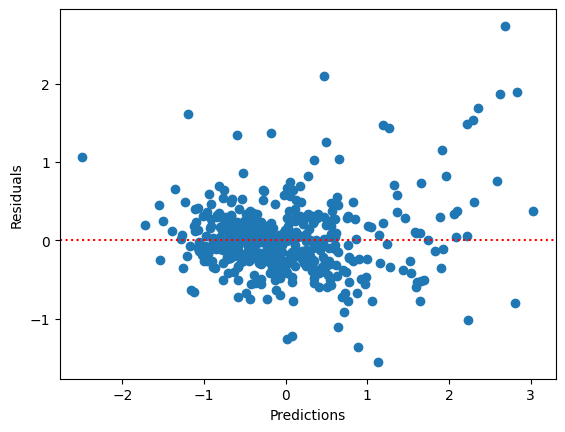

In [39]:
plt.scatter(y_pred_test,y_res)
plt.axhline(y=0, color = 'r', linestyle = ':')
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.show()

In [40]:
#Above plot shows the assumptions regarding LR as the residuals are evenly spread across 0 axis

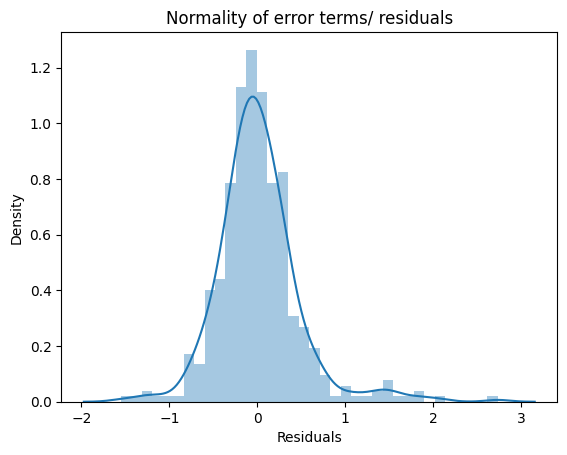

In [41]:
# Distribution of errors
p = sns.distplot(y_res, kde =True)
p = plt.title("Normality of error terms/ residuals")
plt.xlabel('Residuals')
plt.show()

In [42]:
#Lasso - Now lets train using Lasso & later compare
lasso = Lasso()
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [43]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.01}


In [44]:
#Fitting Ridge model for alpha = 100 and displaying coefficients which are penalised
alpha =0.01
lasso = Lasso(alpha=alpha)     
lasso.fit(X_train, y_train) 

Lasso(alpha=0.01)

In [45]:
lasso.coef_

array([ 0.00000000e+00,  6.99451848e-03,  1.60987293e-02, -7.07511417e-03,
        0.00000000e+00,  6.19657825e-03, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  6.88659843e-03, -5.25158240e-03,
        3.46984406e-02, -2.76154921e-02, -0.00000000e+00, -3.30449811e-03,
        0.00000000e+00,  5.78687665e-03,  0.00000000e+00, -0.00000000e+00,
       -4.62193586e-03,  0.00000000e+00,  0.00000000e+00,  7.34665050e-02,
       -3.84371261e-02, -1.09558896e-02, -2.91907907e-02, -2.35275860e-02,
       -4.46790016e-03, -6.66039653e-03,  1.06182923e-02,  3.54367706e-02,
        1.86909913e-01,  1.26849829e-01, -9.55375033e-03,  0.00000000e+00,
       -4.56411620e-03,  1.60938464e-03,  6.82338866e-02,  6.68860879e-02,
        1.03365727e-02,  1.49272382e-02, -1.97677103e-03,  2.30030188e-02,
        1.05772792e-02,  2.97569392e-03, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        4.59562361e-02, -

In [46]:
# calculating R2 score, RSS and RMSE
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train = r2_score(y_train, y_pred_train)
print(r2_train)
metric3.append(r2_train)

0.8303443081052508


In [47]:
r2_test = r2_score(y_test, y_pred_test)
print(r2_test)
metric3.append(r2_test)

0.7829904931842492


In [48]:
rss1 = np.sum(np.square(y_train - y_pred_train))
print(rss1)
metric3.append(rss1)

171.64391273745574


In [49]:
rss2 = np.sum(np.square(y_test - y_pred_test))
print(rss2)
metric3.append(rss2)

96.98873012608234


In [50]:
mse_train = mean_squared_error(y_train, y_pred_train)
print(mse_train)
metric3.append(mse_train**0.5)

0.1681135286360977


In [51]:
mse_test = mean_squared_error(y_test, y_pred_test)
print(mse_test)
metric3.append(mse_test**0.5)

0.2214354569088638


In [52]:
# Checking Lasso regressions residual analyses
y_test_res = y_test - y_pred_test

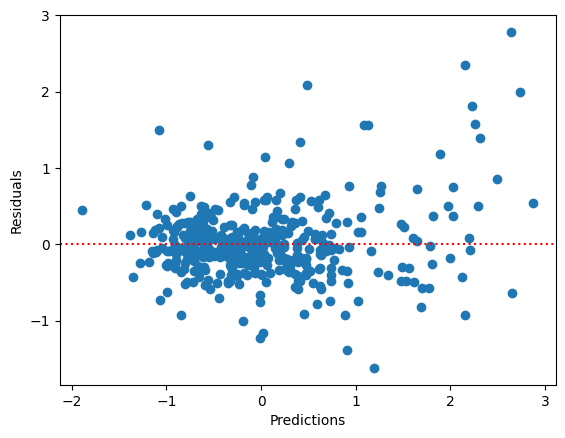

In [53]:
plt.scatter(y_pred_test,y_test_res)
plt.axhline(y=0, color = 'r', linestyle = ':')
plt.xlabel('Predictions')
plt.ylabel('Residuals')
plt.show()

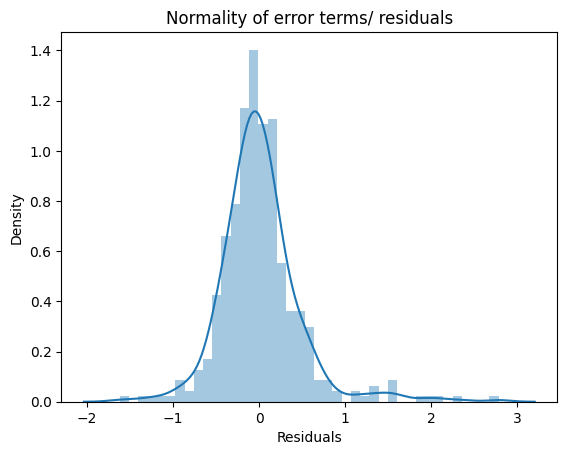

In [54]:
# Plot the Distribution of errors
p = sns.distplot(y_test_res, kde =True)
p = plt.title("Normality of error terms/ residuals")
plt.xlabel('Residuals')
plt.show()

In [55]:
# Printing table which contain all the metrics
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)','MSE (Train)','MSE (Test)'], 'Linear Regression': metric}
lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

In [56]:
#Compare the metrics of LR, Ridge and Lasso
ridge_metric = pd.Series(metric2, name = 'Ridge Regression')
lasso_metric = pd.Series(metric3, name = 'Lasso Regression')
final_metric = pd.concat([lr_metric, ridge_metric, lasso_metric], axis = 1)
final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),8.576230e-01,0.839039,0.830344
1,R2 Score (Test),-6.442133e+26,0.781649,0.782990
2,RSS (Train),1.440455e+02,162.847027,171.643913
3,RSS (Test),2.879203e+29,97.588258,96.988730
4,MSE (Train),3.756099e-01,0.399371,0.410016
5,MSE (Test),2.563888e+13,0.472021,0.470569


In [57]:
#Coefficients Afater Regularization
betas = pd.DataFrame(index=X.columns)

In [58]:
betas.rows = X.columns

In [59]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [60]:
pd.set_option('display.max_rows', None)
betas.head(300)

,Linear,Ridge,Lasso
MSZoning_FV,1.296598e-01,0.017859,0.000000
MSZoning_RH,7.056718e-02,0.015190,0.006995
MSZoning_RL,2.638778e-01,0.041676,0.016099
MSZoning_RM,2.204594e-01,0.008324,-0.007075
Street_Pave,1.153113e-02,0.014663,0.000000
LotShape_IR2,-4.723135e-03,0.004224,0.006197
LotShape_IR3,1.897238e-02,-0.002671,-0.000000
LotShape_Reg,-2.599726e-03,-0.008625,-0.000000
LandContour_HLS,1.570715e-02,0.019934,0.000000
LandContour_Low,2.098923e-02,0.014650,0.000000


In [61]:
#List the features
Chosen_feature = betas.index[betas['Lasso'] != 0]
Chosen_feature

Index(['MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR2',
       'LandContour_Lvl', 'Utilities_NoSeWa', 'LotConfig_CulDSac',
       'LotConfig_FR2', 'LotConfig_Inside', 'LandSlope_Sev',
       ...
       'GarageQual_Fa', 'GarageQual_Gd', 'GarageCond_TA', 'SaleType_CWD',
       'SaleType_Con', 'SaleType_ConLD', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_Alloca'],
      dtype='object', length=109)

In [62]:
#Based in the above analysis it is evident Lasso regression as the optimal method over Ridge and linear regression as the R2 is 0.83 for training data and 0.75 for test data. which is higher than Ridge regression.

In [63]:
#As per question 2 of the Assignment-II Dropping the top five features as predicted with above and calculating again
#Drop 5 features
#Drop 5 features from Train and Test Set
X_train_new = X_train.drop(['Neighborhood_NoRidge','Neighborhood_NridgHt','Neighborhood_StoneBr','RoofMatl_WdShngl','Exterior1st_BrkFace'], axis=1)
X_test_new = X_test.drop(['Neighborhood_NoRidge','Neighborhood_NridgHt','Neighborhood_StoneBr','RoofMatl_WdShngl','Exterior1st_BrkFace'], axis=1)

In [64]:
#Lasso after Dropping Features
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_new, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [65]:
rfe = RFE(lasso,n_features_to_select=5)
rfe.fit(X_train_new, y_train)

RFE(estimator=Lasso(), n_features_to_select=5)

In [66]:
col = X_train_new.columns[rfe.support_]
col

Index(['SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Normal', 'SaleCondition_Partial'],
      dtype='object')

In [ ]:
#End of Assignment Code.